# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [223]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [224]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [225]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 70.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 32.5MB/s]


In [299]:
data = pd.read_csv('./train.csv')

In [300]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
    'IsSeniorCitizen'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [301]:
# Преобразуем данные признака 'TotalSpent' в числовой тип
data['TotalSpent'] = pd.to_numeric(data.TotalSpent, errors='coerce')

In [302]:
# Проверим и обработаем NaN данные
data.isna().sum()

data['TotalSpent'] = data['TotalSpent'].fillna(value = 0)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

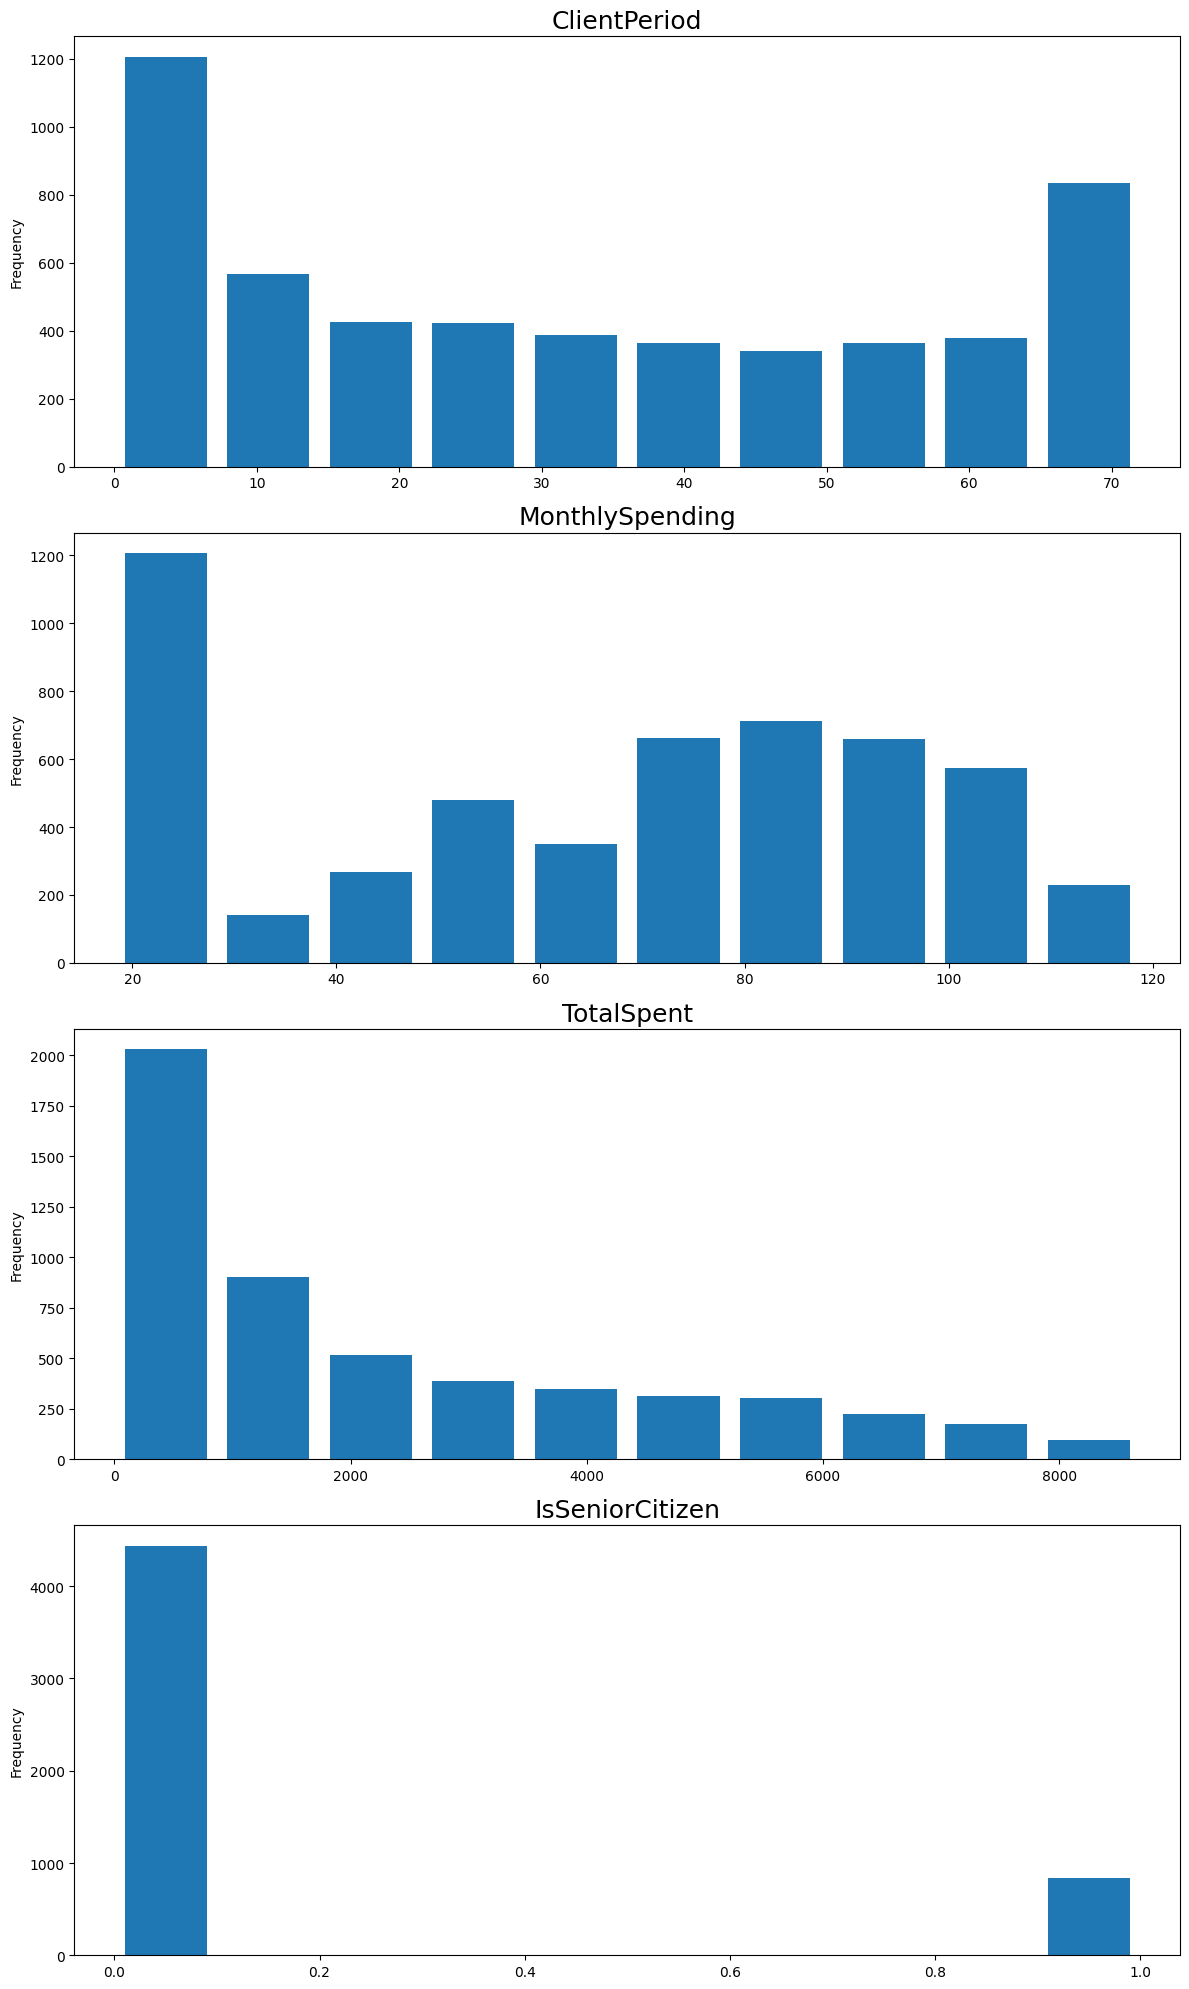

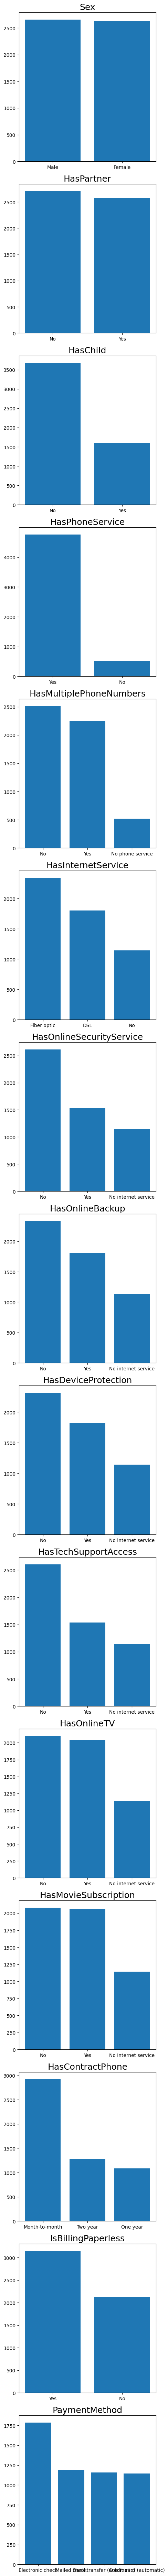

In [303]:
# Построим гистограммы для анализа численных признаков
fig_num, axarr_num = plt.subplots(len(num_cols), 1, figsize=(12, len(num_cols) * 5))

for i in range(len(num_cols)):
  data[num_cols[i]].plot.hist(
      ax=axarr_num[i],
      rwidth = 0.8
  )
  axarr_num[i].set_title(num_cols[i], fontsize=18)

fig_num.tight_layout()

# Построим граифики для анализа категориальных признаков

fig_cat, axarr_cat = plt.subplots(len(cat_cols), 1, figsize=(5, len(cat_cols) * 5))

for i in range(len(cat_cols)):
  data_visual = data[cat_cols[i]].value_counts()
  axarr_cat[i].bar(data_visual.index, data_visual.values)
  axarr_cat[i].set_title(cat_cols[i], fontsize=18)

fig_cat.tight_layout()

In [231]:
data['IsSeniorCitizen'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5282 entries, 0 to 5281
Series name: IsSeniorCitizen
Non-Null Count  Dtype
--------------  -----
5282 non-null   int64
dtypes: int64(1)
memory usage: 41.4 KB


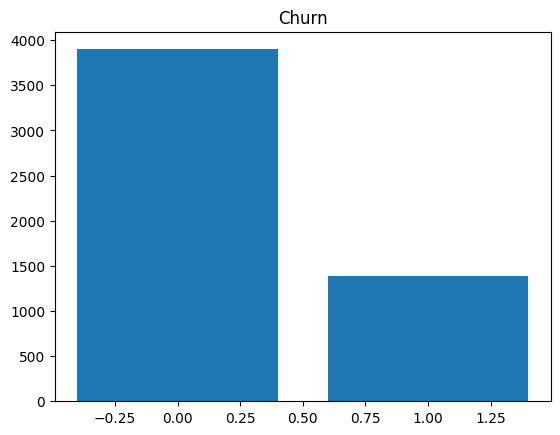

In [304]:
# Построим на график данных для целевой переменной, по которому видим, что целевая переменная сбалансирована (отношение данных примерно 1:3)
data_visual = data[target_col].value_counts()
plt.bar(data_visual.index, data_visual.values)
plt.title(target_col)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [293]:
# Преобразуем бинарные категориальные признаки в числовые
cat_to_num_cols = [
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless'
]

for col in cat_to_num_cols:
  data[col] = [1 if x == data[col].iloc[0] else 0 for x in data[col]]

# Обновим списки для типов признаков
num_cols += cat_to_num_cols
cat_cols = [i for i in cat_cols if i not in cat_to_num_cols]

In [234]:
# Преобразуем категориальные признаки в числовые с помощью one-hot-encoding
dummy_features = pd.get_dummies(data[cat_cols])

In [235]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

In [236]:
# Создадим тренировачную и тестовую выборки данных

X = pd.concat([data, dummy_features], axis=1)
X.drop(columns=cat_cols, inplace=True)
X = X.drop(columns=target_col).values
y = data[target_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.99,
                                                    shuffle=True,
                                                    random_state=42)

In [237]:
# Нормируем данные с помощью StandartScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
# Обучим модель на основе LogisticRegression и найдем оптимальные гиперпараметры в выбранном диапазоне значений с помощью GridSearchCV
parameters_log = {
    'logisticregression__C': np.arange(1, 10, 0.25),
    'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag','saga'],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet']
}

pipeline_log = make_pipeline(StandardScaler(),
                             LogisticRegression(max_iter=1000, random_state=42))

logistic_clf = GridSearchCV(pipeline_log,
                            parameters_log,
                            scoring='roc_auc',
                            cv=10,
                            n_jobs=-1,
                            refit=True)

logistic_clf.fit(X_train_scaled, y_train)
print(logistic_clf.best_score_)

0.8495350724592015


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3600 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib

In [180]:
# Проверим полученную модель на тестовых данных
y_pred_log = logistic_clf.predict(X_test_scaled)
roc_auc_log = roc_auc_score(y_test, y_pred_log)
print(f"best roc-auc: {roc_auc_log}")
print(f"best params: {logistic_clf.best_params_}")

best roc-auc: 0.6541590157914065
best params: {'logisticregression__C': 5.25, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}


In [163]:
# Обучим модель на основе RandomForestClassifier и найдем оптимальные гиперпараметры в выбранном диакпазоне значений с помощью GridSearchCV
parameters_rf = {
    'n_estimators': [*range(100, 500, 100)],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': [*range(1, 100, 10)]
}
rand_forest_clf = GridSearchCV(RandomForestClassifier(), parameters_rf, scoring='roc_auc', cv=5)
rand_forest_clf.fit(X_train_scaled, y_train)
print(rand_forest_clf.best_score_)

0.8509670985914625


In [164]:
# Проверим полученную модель на тестовых данных
y_pred_rf = rand_forest_clf.predict(X_test_scaled)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(roc_auc_rf)

0.6468692618435548


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [65]:
# Установим библиотеку catboost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [306]:
# Подготовим данные для обучения модели на основе CatBoostClassificator
X_origin = data.drop(columns=target_col)
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X_origin,
                                                    y,
                                                    train_size=0.99,
                                                    shuffle=True,
                                                    random_state=42)


In [308]:
# Catboost принимает индексы категориальных признаков для метода fit, поэтому переведем cat_cols в индексы и запишем их в cat_cols_idx
cat_cols_idx = [X_train.columns.get_loc(i) for i in X_train.columns if type(X_train[i].iloc[0]) == str]

In [316]:
# Обучим модель CatBoostClassifier с параметрами по-умолчанию
from catboost import CatBoostClassifier, Pool

cat_boost_clf = CatBoostClassifier(
                                   logging_level="Silent",
                                   random_seed=42,
                                   cat_features=cat_cols_idx
                                   )

cat_boost_clf.fit(X=X_train, y=y_train)

In [317]:
# Вычислим значение метрики ROC-AUC для модели на тестовых данных
cb_proba = cat_boost_clf.predict_proba(X_test)
y_pred_cb_proba = [i[1] for i in cb_proba]
roc_auc_cb_proba = roc_auc_score(y_test, y_pred_cb_proba)
print(roc_auc_cb_proba)

0.7848297213622291


In [315]:
# Найдем оптимальные значения параметров для модели в выбранном диапозоне значений
from catboost import CatBoostClassifier, Pool

cat_boost_clf_gs = CatBoostClassifier(
                                      logging_level="Silent",
                                      eval_metric="AUC:hints=skip_train~false",
                                      cat_features=cat_cols_idx,
                                      random_seed=42
                                   )

parameters_cb = {'num_trees': [*range(1, 1000, 200)],
                 'learning_rate': np.arange(0.01, 0.1, 0.01),
                 "max_depth": np.arange(2, 6, 2)
                 }

cat_boost_clf_gs.grid_search(parameters_cb, X_train, y_train, cv=10, refit=True)

0:	loss: 0.7119777	best: 0.7119777 (0)	total: 28.8ms	remaining: 2.57s
1:	loss: 0.7119777	best: 0.7119777 (0)	total: 41.5ms	remaining: 1.82s
2:	loss: 0.7119777	best: 0.7119777 (0)	total: 49.1ms	remaining: 1.42s
3:	loss: 0.7119777	best: 0.7119777 (0)	total: 56.6ms	remaining: 1.22s
4:	loss: 0.7119777	best: 0.7119777 (0)	total: 64.7ms	remaining: 1.1s
5:	loss: 0.7119777	best: 0.7119777 (0)	total: 72.4ms	remaining: 1.01s
6:	loss: 0.7119777	best: 0.7119777 (0)	total: 81.1ms	remaining: 961ms
7:	loss: 0.7119777	best: 0.7119777 (0)	total: 89.3ms	remaining: 915ms
8:	loss: 0.7119777	best: 0.7119777 (0)	total: 98.4ms	remaining: 885ms

Iteration with suspicious time 1.21 sec ignored in overall statistics.
9:	loss: 0.8285903	best: 0.8285903 (9)	total: 98.4ms	remaining: 885ms

Iteration with suspicious time 1.15 sec ignored in overall statistics.
10:	loss: 0.8329233	best: 0.8329233 (10)	total: 98.4ms	remaining: 885ms

Iteration with suspicious time 1.15 sec ignored in overall statistics.
11:	loss: 0.8

{'params': {'depth': 2, 'learning_rate': 0.03, 'iterations': 801},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
   

In [318]:
# Вычислим значение метрики ROC-AUC для модели на тестовых данных
cb_proba_gs = cat_boost_clf_gs.predict_proba(X_test)
y_pred_cb_proba_gs = [i[1] for i in cb_proba_gs]
roc_auc_cb_proba_gs = roc_auc_score(y_test, y_pred_cb_proba_gs)
print(roc_auc_cb_proba_gs)

0.7755417956656346


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [312]:
best_model = cat_boost_clf

In [313]:
X_valid = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

X_valid['TotalSpent'] = pd.to_numeric(X_valid.TotalSpent, errors='coerce')
X_valid['TotalSpent'] = X_valid['TotalSpent'].fillna(value = 0)

sub_proba = best_model.predict_proba(X_valid)
submission['Churn'] = [i[1] for i in sub_proba]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.

In [314]:
submission

,Id,Churn
0,0,0.046857
1,1,0.779827
2,2,0.698806
3,3,0.010380
4,4,0.003588
...,...,...
1756,1756,0.083346
1757,1757,0.010682
1758,1758,0.852667
1759,1759,0.597357
